In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/olist/olist_order_payments_dataset.csv')

In [3]:
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [4]:
df.payment_value.describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [5]:
print(f"Valor mínimo do payment_value: {df.payment_value.min()}")
print(f"Valor máximo do payment_value: {df.payment_value.max()}")

Valor mínimo do payment_value: 0.0
Valor máximo do payment_value: 13664.08


In [6]:
x_min, x_max = (df.payment_value.min(),
               df.payment_value.max())

In [9]:
print(x_min, x_max)

0.0 13664.08


In [18]:
def min_max_scaler(x, a_min, a_max):
    ''' x é um obj pandas do tipo Series,
        uma coluna
    ''' 
    x_min, x_max = (x.min(), x.max())
    amplitude_x = x_max - x_min
    
    amplitude_a = a_max - a_min
    
    return ((x - x_min)/(amplitude_x))*amplitude_a + a_min

In [19]:
x_min_max_scaled = min_max_scaler(x=df.payment_value,
                                 a_min=-1,
                                 a_max=1)

In [21]:
x_min_max_scaled

0        -0.985461
1        -0.996430
2        -0.990382
3        -0.984224
4        -0.981199
            ...   
103881   -0.946823
103882   -0.985831
103883   -0.993008
103884   -0.945911
103885   -0.971959
Name: payment_value, Length: 103886, dtype: float64

In [22]:
'''
Até 75% dos dados são próximos do val mínimo, muitos outliers
'''
x_min_max_scaled.describe()

count    103886.000000
mean         -0.977444
std           0.031834
min          -1.000000
25%          -0.991688
50%          -0.985363
75%          -0.974848
max           1.000000
Name: payment_value, dtype: float64

<AxesSubplot: >

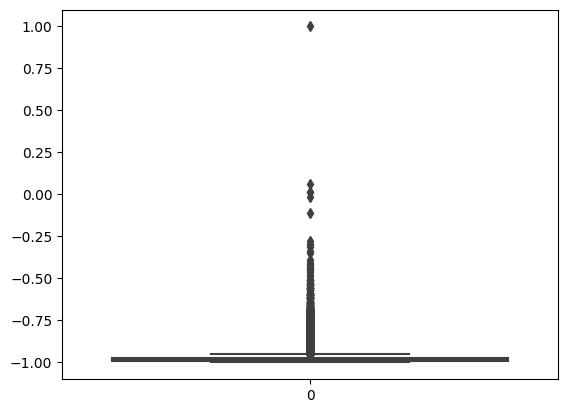

In [24]:
sns.boxplot(x_min_max_scaled.dropna())

#### medidas de dispersão

